<a href="https://colab.research.google.com/github/uzair84/Feature_Eng/blob/main/Feature_Engg_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('/content/test.csv', usecols=['X1', 'X2', 'X3', 'X4' , 'X5' , 'X6'])
data.head()

,X1,X2,X3,X4,X5,X6
0,v,n,f,d,t,a
1,b,ai,a,d,b,g
2,v,as,f,d,a,j
3,l,n,f,d,z,l
4,s,as,c,d,y,i


In [ ]:
print(data.columns)

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6'], dtype='object')


In [ ]:
# Lets see how many unique categories are there in each and every column
# category maybe referring to unique values in the column which is feature indeed

for col in data.columns:
  print(col, ":" , len(data[col].unique()) , 'labels')

X1 : 27 labels
X2 : 45 labels
X3 : 7 labels
X4 : 4 labels
X5 : 32 labels
X6 : 12 labels


In [ ]:
data.shape

(4209, 6)

In [ ]:
# Let's examine how many columns we will obtain after one hot encoding these variables
pd.get_dummies(data, drop_first = True).shape

(4209, 121)

In [ ]:
# after we do one hot encoding ,
# there is another 121 columns that is getting added.
# Increased computation

If we have more than 500 categories in a column and there are 20 columns like that what will we do !!!! 🟥

In [ ]:
# Lets find the top 10 most frequent categories for the variable X2

data.X2.value_counts().sort_values(ascending=False).head(20)

X2
as    1658
ae     478
ai     462
m      348
ak     260
r      155
n      113
s      100
f       85
e       84
ay      78
aq      72
a       44
b       38
k       25
t       25
ag      23
ac      20
ao      19
i       15
Name: count, dtype: int64

In [ ]:
# Let's make a list with the most frequent categories of the variable

top_10 = [x for x in data.X2.value_counts().sort_values(ascending=False).head(10).index]
top_10

['as', 'ae', 'ai', 'm', 'ak', 'r', 'n', 's', 'f', 'e']

In [ ]:
# And now we make the 10 binary variables

for label in top_10:
  data[label] = np.where(data['X2']==label, 1, 0)

data[['X2']+top_10].head(40)

,X2,as,ae,ai,m,ak,r,n,s,f,e
0,n,0,0,0,0,0,0,1,0,0,0
1,ai,0,0,1,0,0,0,0,0,0,0
2,as,1,0,0,0,0,0,0,0,0,0
3,n,0,0,0,0,0,0,1,0,0,0
4,as,1,0,0,0,0,0,0,0,0,0
5,ai,0,0,1,0,0,0,0,0,0,0
6,ae,0,1,0,0,0,0,0,0,0,0
7,ae,0,1,0,0,0,0,0,0,0,0
8,s,0,0,0,0,0,0,0,1,0,0
9,as,1,0,0,0,0,0,0,0,0,0


In [ ]:
# Get the whole set of dummy variables, for all the categorical variables

def one_hot_top_x(df, variable, top_x_labels):
  # function to create the dummy variables for the most frequent labels
  # we can vary the number of most frequent labels that we encode

  for label in top_x_labels:
    df[variable + '_' + label] = np.where( data[variable] == label , 1 , 0 )

# read the data again
data = pd.read_csv('/content/test.csv' , usecols=['X1', 'X2', 'X3' , 'X4' , 'X5' , 'X6'])

# encode X2 into the 10 most frequent categories
one_hot_top_x(data, 'X2' , top_10)
data.head()

,X1,X2,X3,X4,X5,X6,X2_as,X2_ae,X2_ai,X2_m,X2_ak,X2_r,X2_n,X2_s,X2_f,X2_e
0,v,n,f,d,t,a,0,0,0,0,0,0,1,0,0,0
1,b,ai,a,d,b,g,0,0,1,0,0,0,0,0,0,0
2,v,as,f,d,a,j,1,0,0,0,0,0,0,0,0,0
3,l,n,f,d,z,l,0,0,0,0,0,0,1,0,0,0
4,s,as,c,d,y,i,1,0,0,0,0,0,0,0,0,0


In [ ]:
# find the 10 most frequent categories for X1

top_10 = [x for x in data.X1.value_counts().sort_values(ascending=False).head(10).index]

# now create the 10 most frequent dummy variables for X1
one_hot_top_x(data, 'X1', top_10)
data.head()

,X1,X2,X3,X4,X5,X6,X2_as,X2_ae,X2_ai,X2_m,...,X1_aa,X1_s,X1_l,X1_b,X1_v,X1_r,X1_i,X1_a,X1_c,X1_o
0,v,n,f,d,t,a,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,b,ai,a,d,b,g,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,v,as,f,d,a,j,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,l,n,f,d,z,l,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,s,as,c,d,y,i,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0


## Frequency Encoding

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("/content/test.csv" , usecols = ['X1' , 'X2'])
df.head()

,X1,X2
0,v,n
1,b,ai
2,v,as
3,l,n
4,s,as


In [3]:
pd.get_dummies(df).shape

(4209, 72)

In [6]:
len(df['X1'].unique())

27

In [7]:
len(df['X2'].unique())

45

In [8]:
# Lets have a alook at how many labels

for col in df.columns[0:]:
  print(col, ': ' , len(df[col].unique()) , 'labels')

X1 :  27 labels
X2 :  45 labels


In [9]:

df.X2.value_counts().to_dict()

{'as': 1658,
 'ae': 478,
 'ai': 462,
 'm': 348,
 'ak': 260,
 'r': 155,
 'n': 113,
 's': 100,
 'f': 85,
 'e': 84,
 'ay': 78,
 'aq': 72,
 'a': 44,
 'b': 38,
 'k': 25,
 't': 25,
 'ag': 23,
 'ac': 20,
 'ao': 19,
 'i': 15,
 'z': 12,
 'ap': 11,
 'p': 10,
 'aw': 9,
 'h': 6,
 'd': 6,
 'g': 5,
 'q': 5,
 'au': 5,
 'al': 4,
 'ad': 4,
 'af': 4,
 'ab': 4,
 'ah': 3,
 'am': 3,
 'w': 3,
 'at': 3,
 'j': 2,
 'x': 2,
 'av': 1,
 'ax': 1,
 'y': 1,
 'aj': 1,
 'an': 1,
 'u': 1}

In [14]:
# And now let's replace each label in X2 by its count

# first we make a dictionary that maps each label to the counts
df_frequency_map = df.X2.value_counts().to_dict()

In [17]:
df.head()

,X1,X2
0,v,113
1,b,462
2,v,1658
3,l,113
4,s,1658


In [15]:
# And now we replace X2 labels in the dataset df

df.X2 = df.X2.map(df_frequency_map)


In [16]:
df.head()

,X1,X2
0,v,113
1,b,462
2,v,1658
3,l,113
4,s,1658


## **Ordinal Encoding**

In [36]:
import pandas as pd
import numpy as np
import datetime

In [37]:
datetime.datetime.today()

datetime.datetime(2024, 7, 30, 18, 47, 14, 592204)

In [38]:
df_base = datetime.datetime.today()
df_date_list = [df_base - datetime.timedelta(days=x) for x in range(0, 20)]
df = pd.DataFrame(df_date_list)
df.columns = ['day']
df

,day
0,2024-07-30 18:47:14.603743
1,2024-07-29 18:47:14.603743
2,2024-07-28 18:47:14.603743
3,2024-07-27 18:47:14.603743
4,2024-07-26 18:47:14.603743
5,2024-07-25 18:47:14.603743
6,2024-07-24 18:47:14.603743
7,2024-07-23 18:47:14.603743
8,2024-07-22 18:47:14.603743
9,2024-07-21 18:47:14.603743


In [39]:
# extract the weekday name from it

df['Day_Of_The_Week'] = df['day'].dt.day_name()
df.head()

,day,Day_Of_The_Week
0,2024-07-30 18:47:14.603743,Tuesday
1,2024-07-29 18:47:14.603743,Monday
2,2024-07-28 18:47:14.603743,Sunday
3,2024-07-27 18:47:14.603743,Saturday
4,2024-07-26 18:47:14.603743,Friday


In [40]:
df['Month'] = df['day'].dt.month
df.head()

,day,Day_Of_The_Week,Month
0,2024-07-30 18:47:14.603743,Tuesday,7
1,2024-07-29 18:47:14.603743,Monday,7
2,2024-07-28 18:47:14.603743,Sunday,7
3,2024-07-27 18:47:14.603743,Saturday,7
4,2024-07-26 18:47:14.603743,Friday,7


In [41]:
df['Year'] = df['day'].dt.year
df.head()

,day,Day_Of_The_Week,Month,Year
0,2024-07-30 18:47:14.603743,Tuesday,7,2024
1,2024-07-29 18:47:14.603743,Monday,7,2024
2,2024-07-28 18:47:14.603743,Sunday,7,2024
3,2024-07-27 18:47:14.603743,Saturday,7,2024
4,2024-07-26 18:47:14.603743,Friday,7,2024


In [42]:
# Engineer categorical variable by ordinal number replacement

weekday_map = {'Monday' : 1,
               'Tuesday' : 2,
               'Wednesday' : 3,
               'Thursday' : 4,
               'Friday' : 5,
               'Saturday' : 6,
               'Sunday' : 7
}

df['day_ordinal'] = df.Day_Of_The_Week.map(weekday_map)
df.head(10)

,day,Day_Of_The_Week,Month,Year,day_ordinal
0,2024-07-30 18:47:14.603743,Tuesday,7,2024,2
1,2024-07-29 18:47:14.603743,Monday,7,2024,1
2,2024-07-28 18:47:14.603743,Sunday,7,2024,7
3,2024-07-27 18:47:14.603743,Saturday,7,2024,6
4,2024-07-26 18:47:14.603743,Friday,7,2024,5
5,2024-07-25 18:47:14.603743,Thursday,7,2024,4
6,2024-07-24 18:47:14.603743,Wednesday,7,2024,3
7,2024-07-23 18:47:14.603743,Tuesday,7,2024,2
8,2024-07-22 18:47:14.603743,Monday,7,2024,1
9,2024-07-21 18:47:14.603743,Sunday,7,2024,7


# **Missing Values - Feature Engineering**

why is data missing ?

 **What are the different types of Missing Data?**
1. Missing completely at Random, ***MCAR*** : A variable is missing completely at random(MCAR) if the probability of being missing is the same for all the observations. When data is MCAR, there is absolutely no relationship between the data missing and any other values, observed or missing, within the dataset. In other words, those missing data points are a random subset of the data. There is nothing systematic going on that makes some data more likely to be missing than other.

In [44]:
import pandas as pd

In [45]:
df = pd.read_csv('/content/Titanic-Dataset.csv')

In [47]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [48]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


The data missing in columns like `Age` and `Cabin` is not Missing completely at random. Reason:

* This data was recorded after the accident had happened, so who was there to identify the age of the dead folks in titanic.

* Those missing folks might be living in the cabin that got destroyed by the accident. And, thereby the cabin value is also empty.

In [49]:
df.shape

(891, 12)

In [52]:
# Embarked : From which station have the passengers been picked up from

df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


This `Embarked` value is a perfect example of missing completely at random.

**2. Missing Data Not At Random (MNAR) : Systematic Missing Values**

This means there is some relationship between the data missing and any other values, observed or missing, within the dataset.

In [56]:
import numpy as np

df['cabin_null'] = np.where(df['Cabin'].isnull() , 1,0)

# find the percentage of null values
df['cabin_null'].mean()

0.7710437710437711

In [57]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'cabin_null'],
      dtype='object')

In [59]:
df.groupby(['Survived'])['cabin_null'].mean()

,cabin_null
Survived,
0,0.876138
1,0.602339


**3. Missing Data At Random (MAR)**

* Men hide their salary
* Female hiding their age



**Techniques of handling missing values**

1. Mean / Median / Mode replacement
2. Random Sample Imputation
3. Capturing NAN values with a new feature
4. End of Distribution
5. Arbitrary imputation
6. Frequent categories imputation

## **Mean / Median / Mode Imputation**

when should we apply ?
- Mean / Median imputation has the assumption that the data are missing completely at random (MCAR). We solve this by replacing the NAN with the most frequent occurence of the variables.

In [79]:
df = pd.read_csv('/content/Titanic-Dataset.csv' , usecols = ['Age' , 'Fare' , 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [80]:
df.isnull().mean()

,0
Survived,0.000000
Age,0.198653
Fare,0.000000


In [81]:
def impute_nan(df, variable, median):
  df[variable +"_median"] = df[variable].fillna(median)

In [82]:
median = df.Age.median()
median

28.0

 This means most of the passengers were at the age of 28 years.

In [83]:
impute_nan(df , 'Age' , median)
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [84]:
df.isnull().sum()

,0
Survived,0
Age,177
Fare,0
Age_median,0


In [85]:
print(df['Age'].std())
print(df['Age_median'].std())

14.526497332334042
13.019696550973201


In [86]:
import matplotlib.pyplot as plt
%matplotlib inline

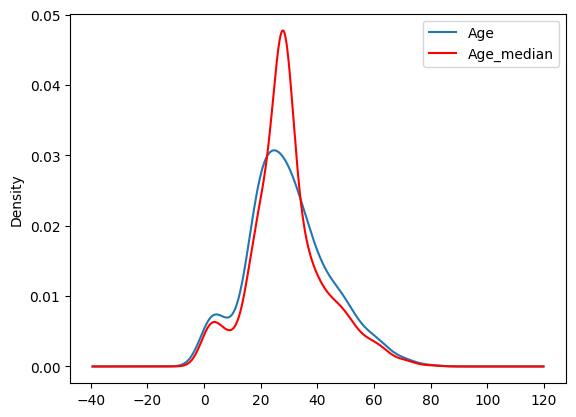

In [89]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind = 'kde' , ax = ax)
df.Age_median.plot(kind = 'kde' , ax = ax , color = 'red')
lines , labels = ax.get_legend_handles_labels()
ax.legend(lines , labels , loc = 'best')

In [77]:
df.drop(['Age'] , axis = 1 , inplace = True)

### **Advantages and Disadvantages of Mean/Median Imputation**

**Advantages**
1. Easy to implement
2. Faster way to obtain the complete dataset

**Disadvantages**
1. Change or distort the original variance
2. Impacts Correlation